<a href="https://colab.research.google.com/github/chingyaousf/Intern-project-2023/blob/main/scripts/MLpredictionDep_03_Model_RF_SQSTM1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
# Loading the Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DeepDEP/filtered_arranged_table.csv")
data

,DepMap_ID,A1BG (1) Exp,A1CF (29974) Exp,A2M (2) Exp,A2ML1 (144568) Exp,A3GALT2 (127550) Exp,A4GALT (53947) Exp,A4GNT (51146) Exp,AAAS (8086) Exp,AACS (65985) Exp,...,ZYG11A (440590) Exp,ZYG11B (79699) Exp,ZYX (7791) Exp,ZZEF1 (23140) Exp,ZZZ3 (26009) Exp,EIF2AK3 (9451) Dep,MYC (4609) Dep,NQO1 (1728) Dep,SF3B1 (23451) Dep,SQSTM1 (8878) Dep
0,ACH-000001,3.116032,0.056584,0.226509,0.111031,0.000000,1.035624,0.176323,5.700440,4.144046,...,3.282440,2.797013,6.821455,3.010780,4.381975,0.018546,0.807414,0.076613,1.000000,0.020657
1,ACH-000004,4.178715,0.000000,0.214125,0.344828,0.070389,0.097611,0.000000,6.336819,3.231125,...,0.014355,2.032101,7.002252,3.444932,4.910733,0.044907,0.999985,0.061617,1.000000,0.049385
2,ACH-000005,4.003602,0.014355,0.137504,0.014355,0.000000,0.028569,0.000000,6.337176,3.781360,...,0.014355,2.761285,6.826421,3.524816,5.592457,0.009301,1.000000,0.049535,0.994004,0.015969
3,ACH-000007,0.137504,1.405992,0.201634,0.000000,0.000000,0.014355,0.000000,5.431289,4.300856,...,0.014355,1.989139,6.332708,3.673556,3.469886,0.058868,0.999620,0.036902,0.999886,0.041706
4,ACH-000009,1.464668,3.586164,0.250962,0.000000,0.042644,4.525443,0.000000,5.674122,4.510962,...,1.356144,2.956057,7.853185,3.442280,3.351911,0.040590,0.979828,0.006602,0.973598,0.034535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,ACH-002785,1.967169,0.000000,2.198494,0.000000,0.000000,1.490570,0.000000,5.300490,4.314697,...,0.014355,4.173127,6.560256,2.969012,5.276869,0.038095,0.701928,0.161286,1.000000,0.136197
1001,ACH-002800,3.847997,0.000000,5.899901,0.321928,0.000000,3.206331,0.000000,5.831877,3.822730,...,0.622930,3.084064,6.596935,3.177918,4.847997,0.177952,0.462993,0.054260,1.000000,0.022899
1002,ACH-002834,1.819668,0.014355,0.014355,0.201634,0.000000,2.912650,0.028569,5.646451,4.547820,...,1.400538,2.568032,6.953498,3.087463,4.226509,0.002074,0.911326,0.022301,0.998623,0.013754
1003,ACH-002847,2.990955,0.000000,7.608440,0.014355,0.000000,0.584963,0.000000,5.104337,4.228819,...,1.480265,2.748461,7.432041,2.903038,4.660495,0.161273,0.704900,0.184386,0.999903,0.058351


In [ ]:
# Loading the Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/SQSTM1_gt_00.csv")
data

,DepMap_ID,A1CF (29974) Exp,A2M (2) Exp,A3GALT2 (127550) Exp,A4GALT (53947) Exp,A4GNT (51146) Exp,AACS (65985) Exp,AADAC (13) Exp,AADACL4 (343066) Exp,AADAT (51166) Exp,...,ZSWIM8 (23053) Exp,ZXDA (7789) Exp,ZXDB (158586) Exp,ZYG11B (79699) Exp,ZYX (7791) Exp,EIF2AK3 (9451) Dep,MYC (4609) Dep,NQO1 (1728) Dep,SF3B1 (23451) Dep,SQSTM1 (8878) Dep
0,ACH-000001,0.056584,0.226509,0.000000,1.035624,0.176323,4.144046,0.790772,0.000000,3.415488,...,5.663345,0.978196,1.914565,2.797013,6.821455,0.018546,0.807414,0.076613,1.000000,0.020657
1,ACH-000004,0.000000,0.214125,0.070389,0.097611,0.000000,3.231125,0.000000,0.000000,0.042644,...,4.969012,0.765535,1.622930,2.032101,7.002252,0.044907,0.999985,0.061617,1.000000,0.049385
2,ACH-000005,0.014355,0.137504,0.000000,0.028569,0.000000,3.781360,0.000000,0.000000,0.000000,...,4.448901,0.807355,1.773996,2.761285,6.826421,0.009301,1.000000,0.049535,0.994004,0.015969
3,ACH-000007,1.405992,0.201634,0.000000,0.014355,0.000000,4.300856,3.547203,0.000000,2.629939,...,4.743623,0.526069,1.761285,1.989139,6.332708,0.058868,0.999620,0.036902,0.999886,0.041706
4,ACH-000009,3.586164,0.250962,0.042644,4.525443,0.000000,4.510962,1.985500,0.000000,2.684819,...,5.383013,0.815575,2.176323,2.956057,7.853185,0.040590,0.979828,0.006602,0.973598,0.034535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,ACH-002785,0.000000,2.198494,0.000000,1.490570,0.000000,4.314697,0.042644,0.000000,2.356144,...,4.686501,1.111031,2.817623,4.173127,6.560256,0.038095,0.701928,0.161286,1.000000,0.136197
1001,ACH-002800,0.000000,5.899901,0.000000,3.206331,0.000000,3.822730,1.443607,0.333424,1.843984,...,5.363522,0.970854,2.634593,3.084064,6.596935,0.177952,0.462993,0.054260,1.000000,0.022899
1002,ACH-002834,0.014355,0.014355,0.000000,2.912650,0.028569,4.547820,0.000000,0.042644,2.748461,...,5.765800,1.659925,3.224966,2.568032,6.953498,0.002074,0.911326,0.022301,0.998623,0.013754
1003,ACH-002847,0.000000,7.608440,0.000000,0.584963,0.000000,4.228819,0.000000,0.000000,2.565597,...,6.049413,0.978196,1.867896,2.748461,7.432041,0.161273,0.704900,0.184386,0.999903,0.058351


In [ ]:
# Loading the Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/SQSTM1_gt_01.csv")
data

,DepMap_ID,A4GNT (51146) Exp,AAMP (14) Exp,ABCA13 (154664) Exp,ABCB5 (340273) Exp,ABCB6 (10058) Exp,ABCB8 (11194) Exp,ABCB9 (23457) Exp,ABCC2 (1244) Exp,ABCC3 (8714) Exp,...,ZNHIT1 (10467) Exp,ZPLD1 (131368) Exp,ZSWIM4 (65249) Exp,ZSWIM8 (23053) Exp,ZYX (7791) Exp,EIF2AK3 (9451) Dep,MYC (4609) Dep,NQO1 (1728) Dep,SF3B1 (23451) Dep,SQSTM1 (8878) Dep
0,ACH-000001,0.176323,7.074034,0.028569,0.378512,4.811985,3.879706,2.761285,0.263034,3.301588,...,6.511120,0.000000,2.150560,5.663345,6.821455,0.018546,0.807414,0.076613,1.000000,0.020657
1,ACH-000004,0.000000,6.659925,0.000000,0.214125,4.973152,4.115200,4.761817,0.613532,2.182692,...,5.520422,0.014355,1.238787,4.969012,7.002252,0.044907,0.999985,0.061617,1.000000,0.049385
2,ACH-000005,0.000000,6.783326,0.000000,0.356144,5.231509,3.928844,3.962549,0.464668,1.304511,...,5.790772,0.000000,0.933573,4.448901,6.826421,0.009301,1.000000,0.049535,0.994004,0.015969
3,ACH-000007,0.000000,6.582405,0.000000,0.028569,3.392317,5.655352,2.223423,0.948601,6.802064,...,6.942866,0.000000,1.176323,4.743623,6.332708,0.058868,0.999620,0.036902,0.999886,0.041706
4,ACH-000009,0.000000,7.281327,0.014355,0.014355,5.590662,4.608809,1.422233,6.413289,4.032101,...,6.460906,0.000000,1.070389,5.383013,7.853185,0.040590,0.979828,0.006602,0.973598,0.034535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,ACH-002785,0.000000,6.272023,0.443607,0.000000,3.730096,3.094236,2.336283,0.678072,4.734981,...,6.315965,0.097611,3.134221,4.686501,6.560256,0.038095,0.701928,0.161286,1.000000,0.136197
1001,ACH-002800,0.000000,6.061992,1.891419,0.014355,2.805292,3.280956,1.726831,0.545968,1.910733,...,7.000789,0.263034,2.435629,5.363522,6.596935,0.177952,0.462993,0.054260,1.000000,0.022899
1002,ACH-002834,0.028569,6.401733,0.594549,0.344828,3.226509,2.722466,3.832890,1.144046,3.184280,...,6.122880,0.070389,2.797013,5.765800,6.953498,0.002074,0.911326,0.022301,0.998623,0.013754
1003,ACH-002847,0.000000,6.381802,0.378512,0.070389,3.379898,4.222650,5.932156,4.543496,5.246788,...,6.834281,0.014355,2.195348,6.049413,7.432041,0.161273,0.704900,0.184386,0.999903,0.058351


In [ ]:
# Loading the Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/SQSTM1_ng_01.csv")
data

,DepMap_ID,A2ML1 (144568) Exp,ABCB7 (22) Exp,ABRAXAS1 (84142) Exp,ACADM (34) Exp,ACRBP (84519) Exp,ADA (100) Exp,ADAD2 (161931) Exp,ADAT2 (134637) Exp,ADCY4 (196883) Exp,...,ZNF821 (55565) Exp,ZNF831 (128611) Exp,ZNF878 (729747) Exp,ZPBP2 (124626) Exp,ZUP1 (221302) Exp,EIF2AK3 (9451) Dep,MYC (4609) Dep,NQO1 (1728) Dep,SF3B1 (23451) Dep,SQSTM1 (8878) Dep
0,ACH-000001,0.111031,4.771886,2.144046,4.662205,0.584963,3.237258,0.000000,2.592158,0.150560,...,2.451541,0.0,0.163499,0.000000,3.928844,0.018546,0.807414,0.076613,1.000000,0.020657
1,ACH-000004,0.344828,4.238023,3.258519,6.898934,4.100137,3.292782,0.042644,4.478972,0.389567,...,1.632268,0.0,0.422233,0.000000,3.536053,0.044907,0.999985,0.061617,1.000000,0.049385
2,ACH-000005,0.014355,4.621173,3.963474,7.203788,3.331992,4.060047,0.042644,4.164304,0.298658,...,1.035624,0.0,0.815575,0.189034,4.253989,0.009301,1.000000,0.049535,0.994004,0.015969
3,ACH-000007,0.000000,3.582556,2.211012,5.280585,1.070389,2.003602,0.028569,3.602884,1.257011,...,0.925999,0.0,0.584963,0.000000,3.353323,0.058868,0.999620,0.036902,0.999886,0.041706
4,ACH-000009,0.000000,4.415488,3.354734,4.773469,0.163499,3.917432,0.000000,2.548437,0.056584,...,2.648465,0.0,0.042644,0.000000,3.817623,0.040590,0.979828,0.006602,0.973598,0.034535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,ACH-002785,0.000000,4.857981,2.370164,6.077457,0.000000,1.974529,0.000000,1.063503,0.097611,...,1.782409,0.0,0.526069,0.000000,2.173127,0.038095,0.701928,0.161286,1.000000,0.136197
1001,ACH-002800,0.321928,4.744699,3.604071,5.863938,0.400538,3.834913,0.000000,0.847997,0.933573,...,1.974529,0.0,0.310340,0.028569,3.653060,0.177952,0.462993,0.054260,1.000000,0.022899
1002,ACH-002834,0.201634,4.505256,3.198494,4.965784,0.641546,4.604664,0.137504,1.918386,0.731183,...,3.513491,0.0,1.560715,0.000000,3.114367,0.002074,0.911326,0.022301,0.998623,0.013754
1003,ACH-002847,0.014355,4.067811,2.448901,6.068456,0.163499,1.655352,0.014355,1.948601,0.028569,...,1.933573,0.0,0.545968,0.000000,3.347666,0.161273,0.704900,0.184386,0.999903,0.058351


In [ ]:
from numpy import true_divide
# Cleaning Column Names
clean_column_names = {}
for column in data.columns:
    clean_column_names[column] = column.strip().replace(' ', '_').replace('(', '').replace(')', '')

data.rename(columns=clean_column_names, inplace=True)
data

,DepMap_ID,A2ML1_144568_Exp,ABCB7_22_Exp,ABRAXAS1_84142_Exp,ACADM_34_Exp,ACRBP_84519_Exp,ADA_100_Exp,ADAD2_161931_Exp,ADAT2_134637_Exp,ADCY4_196883_Exp,...,ZNF821_55565_Exp,ZNF831_128611_Exp,ZNF878_729747_Exp,ZPBP2_124626_Exp,ZUP1_221302_Exp,EIF2AK3_9451_Dep,MYC_4609_Dep,NQO1_1728_Dep,SF3B1_23451_Dep,SQSTM1_8878_Dep
0,ACH-000001,0.111031,4.771886,2.144046,4.662205,0.584963,3.237258,0.000000,2.592158,0.150560,...,2.451541,0.0,0.163499,0.000000,3.928844,0.018546,0.807414,0.076613,1.000000,0.020657
1,ACH-000004,0.344828,4.238023,3.258519,6.898934,4.100137,3.292782,0.042644,4.478972,0.389567,...,1.632268,0.0,0.422233,0.000000,3.536053,0.044907,0.999985,0.061617,1.000000,0.049385
2,ACH-000005,0.014355,4.621173,3.963474,7.203788,3.331992,4.060047,0.042644,4.164304,0.298658,...,1.035624,0.0,0.815575,0.189034,4.253989,0.009301,1.000000,0.049535,0.994004,0.015969
3,ACH-000007,0.000000,3.582556,2.211012,5.280585,1.070389,2.003602,0.028569,3.602884,1.257011,...,0.925999,0.0,0.584963,0.000000,3.353323,0.058868,0.999620,0.036902,0.999886,0.041706
4,ACH-000009,0.000000,4.415488,3.354734,4.773469,0.163499,3.917432,0.000000,2.548437,0.056584,...,2.648465,0.0,0.042644,0.000000,3.817623,0.040590,0.979828,0.006602,0.973598,0.034535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,ACH-002785,0.000000,4.857981,2.370164,6.077457,0.000000,1.974529,0.000000,1.063503,0.097611,...,1.782409,0.0,0.526069,0.000000,2.173127,0.038095,0.701928,0.161286,1.000000,0.136197
1001,ACH-002800,0.321928,4.744699,3.604071,5.863938,0.400538,3.834913,0.000000,0.847997,0.933573,...,1.974529,0.0,0.310340,0.028569,3.653060,0.177952,0.462993,0.054260,1.000000,0.022899
1002,ACH-002834,0.201634,4.505256,3.198494,4.965784,0.641546,4.604664,0.137504,1.918386,0.731183,...,3.513491,0.0,1.560715,0.000000,3.114367,0.002074,0.911326,0.022301,0.998623,0.013754
1003,ACH-002847,0.014355,4.067811,2.448901,6.068456,0.163499,1.655352,0.014355,1.948601,0.028569,...,1.933573,0.0,0.545968,0.000000,3.347666,0.161273,0.704900,0.184386,0.999903,0.058351


In [ ]:
# Exclude 'DepMap_ID' column
data_without_id = data.drop(columns=['DepMap_ID'])

# Extracting Features and Targets
features = data_without_id.drop(columns=[col for col in data_without_id.columns if 'Dep' in col])
# targets = data_without_id[[col for col in data_without_id.columns if 'Dep' in col]]
targets = data_without_id[["SQSTM1_8878_Dep"]]

targets

,SQSTM1_8878_Dep
0,0.020657
1,0.049385
2,0.015969
3,0.041706
4,0.034535
...,...
1000,0.136197
1001,0.022899
1002,0.013754
1003,0.058351


In [ ]:
# Splitting the Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)


In [ ]:
# Creating and Training the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

<ipython-input-6-dbdfc2eb6e5e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Making Predictions
y_pred = rf.predict(X_test)


In [ ]:
# Printing Predicted Values
print('Predicted Values:', y_pred)


Predicted Values: [0.05753266 0.05243085 0.12295344 0.08601084 0.08418777 0.05157452
 0.0861877  0.1186354  0.06413997 0.06428041 0.05491275 0.04582815
 0.09560031 0.21279955 0.03322978 0.05157186 0.05767476 0.12940543
 0.09265334 0.08154244 0.07591266 0.08399785 0.06776818 0.10800843
 0.06571756 0.06139039 0.06875779 0.07617823 0.13538015 0.06382204
 0.07717836 0.05527048 0.06978677 0.06733069 0.06409177 0.06202653
 0.08004743 0.08651167 0.06798692 0.0642662  0.0960487  0.05751767
 0.07237031 0.10062771 0.09510976 0.07166773 0.08496015 0.07776076
 0.08754223 0.12987323 0.21270688 0.04923391 0.07317189 0.06085026
 0.05410677 0.04115113 0.05699242 0.06923249 0.07966807 0.0530537
 0.33924195 0.05883582 0.07862777 0.05874834 0.05084992 0.06338193
 0.07145911 0.04602347 0.05764445 0.06647021 0.04993079 0.05690106
 0.09732121 0.05472116 0.08512129 0.10989062 0.11289492 0.08197569
 0.05323325 0.05364067 0.05180306 0.08054523 0.0508912  0.04891514
 0.06796085 0.11006266 0.13003577 0.07665451 

In [ ]:
# Evaluating the Model
# Mean Squared Error. It is a common metric used to measure the average squared difference between the predicted and actual values in regression tasks.
# Lower values of MSE indicate better model performance, as it means the predicted values are closer to the actual values. However, MSE is sensitive to outliers since the squared differences magnify their impact on the overall error.

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 0.014269892467848905


In [ ]:
# Mean Absolute Error (MAE) measures the average absolute difference between the predicted and actual values. It gives a straightforward measure of the average prediction error. Lower MAE values indicate better accuracy.

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)


Mean Absolute Error: 0.06659448031584864


In [ ]:
# R-squared (coefficient of determination) measures the proportion of the variance in the target variable that is explained by the model. It ranges from 0 to 1

r_squared = rf.score(X_test, y_test)
print('R-squared:', r_squared)


R-squared: -0.3580690597348273


In [ ]:
# SQSTM1_filtered_arranged_table.csv

from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r_squared = rf.score(X_test, y_test)
print('R-squared:', r_squared)


Mean Squared Error: 0.00780279667074806
Mean Absolute Error: 0.053199696917526525
R-squared: 0.257405985236394


In [ ]:
# SQSTM1_gt_00.csv

from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r_squared = rf.score(X_test, y_test)
print('R-squared:', r_squared)

Mean Squared Error: 0.0077652690906857445
Mean Absolute Error: 0.052031761769735035
R-squared: 0.26097749395548075


In [ ]:
# SQSTM1_gt_01.csv

from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r_squared = rf.score(X_test, y_test)
print('R-squared:', r_squared)

Mean Squared Error: 0.008490916533031424
Mean Absolute Error: 0.05337602149707182
R-squared: 0.19191745429885865


In [ ]:
# SQSTM1_ng_01.csv

from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r_squared = rf.score(X_test, y_test)
print('R-squared:', r_squared)

Mean Squared Error: 0.014269892467848905
Mean Absolute Error: 0.06659448031584864
R-squared: -0.3580690597348273


In [ ]:
# SQSTM1_filtered_arranged_table.csv

# Retrieve the 'DepMap_ID' column before splitting
depmap_id_column = data['DepMap_ID']

# Create a new DataFrame for the test set with the predicted and actual values
test_data = X_test.copy()

# Add 'DepMap_ID' column to test_data
test_data.insert(0, 'DepMap_ID', depmap_id_column.iloc[X_test.index].values)

target_col = "SQSTM1_8878_Dep"  # Replace with the name of your target column

pred_col = f'Pred_{target_col}'
test_data[pred_col] = y_pred  # Assign predicted values to the new column

actual_col = target_col
test_data[actual_col] = y_test.values  # Assign actual values to the target column

# Save the DataFrame to a CSV file
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/RF_SQSTM1_filtered_arranged_table.csv", index=False)

# Display the updated DataFrame
test_data

,DepMap_ID,A1BG_1_Exp,A1CF_29974_Exp,A2M_2_Exp,A2ML1_144568_Exp,A3GALT2_127550_Exp,A4GALT_53947_Exp,A4GNT_51146_Exp,AAAS_8086_Exp,AACS_65985_Exp,...,ZXDA_7789_Exp,ZXDB_158586_Exp,ZXDC_79364_Exp,ZYG11A_440590_Exp,ZYG11B_79699_Exp,ZYX_7791_Exp,ZZEF1_23140_Exp,ZZZ3_26009_Exp,Pred_SQSTM1_8878_Dep,SQSTM1_8878_Dep
926,ACH-001858,0.176323,0.056584,0.097611,0.014355,0.000000,3.035624,0.056584,5.299758,4.263034,...,0.992768,2.451541,2.889474,0.815575,2.976364,7.199967,3.465974,4.780310,0.068637,0.100194
630,ACH-000962,4.410748,0.028569,0.056584,0.000000,0.028569,1.189034,0.014355,5.620000,4.238023,...,1.599318,2.538538,3.364572,2.307429,2.980025,6.212569,3.214125,3.919340,0.038526,0.077090
682,ACH-001164,4.262283,0.000000,5.371210,0.000000,0.000000,1.765535,0.000000,5.003152,3.489286,...,0.495695,1.244887,2.711495,0.333424,2.495695,4.735522,2.107688,3.363171,0.177663,0.173517
514,ACH-000799,4.440288,0.014355,6.867773,0.014355,0.163499,0.641546,0.124328,5.484460,4.268285,...,0.807355,1.475085,4.251719,0.475085,2.077243,7.966477,4.179511,3.481557,0.108651,0.082562
365,ACH-000571,5.489928,0.000000,0.678072,0.000000,0.042644,3.016140,0.214125,5.319040,4.609400,...,0.516015,1.918386,3.526069,0.000000,3.114367,6.934281,4.079805,4.527946,0.164857,0.268415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,ACH-000339,0.111031,0.014355,0.028569,0.000000,0.000000,1.378512,0.028569,5.497612,3.605257,...,0.505891,1.769772,3.135863,2.319040,2.367371,7.258236,2.841973,4.584361,0.063444,0.035018
778,ACH-001454,0.400538,0.000000,0.189034,0.163499,0.000000,4.678072,0.000000,4.751678,4.521051,...,1.104337,1.847997,2.754888,1.220330,2.459432,5.038261,2.782409,2.657640,0.070626,0.074650
334,ACH-000522,4.157044,0.000000,0.214125,0.000000,0.000000,2.893362,0.014355,6.321026,3.298658,...,0.823749,1.879706,3.442280,2.761285,3.238787,7.097295,4.590362,4.649041,0.069956,0.106541
210,ACH-000343,4.189034,0.042644,0.014355,0.367371,0.000000,2.304511,0.097611,5.744699,4.082362,...,5.763943,5.212180,3.607626,3.411426,3.869871,3.674687,2.611172,4.669027,0.061288,0.011019


In [ ]:
# SQSTM1_gt_00.csv

# Retrieve the 'DepMap_ID' column before splitting
depmap_id_column = data['DepMap_ID']

# Create a new DataFrame for the test set with the predicted and actual values
test_data = X_test.copy()

# Add 'DepMap_ID' column to test_data
test_data.insert(0, 'DepMap_ID', depmap_id_column.iloc[X_test.index].values)

target_col = "SQSTM1_8878_Dep"  # Replace with the name of your target column

pred_col = f'Pred_{target_col}'
test_data[pred_col] = y_pred  # Assign predicted values to the new column

actual_col = target_col
test_data[actual_col] = y_test.values  # Assign actual values to the target column

# Save the DataFrame to a CSV file
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/RF_SQSTM1_gt_00.csv", index=False)

# Display the updated DataFrame
test_data

,DepMap_ID,A1CF_29974_Exp,A2M_2_Exp,A3GALT2_127550_Exp,A4GALT_53947_Exp,A4GNT_51146_Exp,AACS_65985_Exp,AADAC_13_Exp,AADACL4_343066_Exp,AADAT_51166_Exp,...,ZSWIM4_65249_Exp,ZSWIM5_57643_Exp,ZSWIM6_57688_Exp,ZSWIM8_23053_Exp,ZXDA_7789_Exp,ZXDB_158586_Exp,ZYG11B_79699_Exp,ZYX_7791_Exp,Pred_SQSTM1_8878_Dep,SQSTM1_8878_Dep
926,ACH-001858,0.056584,0.097611,0.000000,3.035624,0.056584,4.263034,1.700440,0.000000,1.485427,...,3.647315,0.310340,2.778209,5.402586,0.992768,2.451541,2.976364,7.199967,0.068231,0.100194
630,ACH-000962,0.028569,0.056584,0.028569,1.189034,0.014355,4.238023,0.000000,0.000000,2.859970,...,1.636915,0.739848,2.157044,4.672991,1.599318,2.538538,2.980025,6.212569,0.042613,0.077090
682,ACH-001164,0.000000,5.371210,0.000000,1.765535,0.000000,3.489286,0.000000,0.028569,1.244887,...,3.447579,0.584963,2.596935,4.546586,0.495695,1.244887,2.495695,4.735522,0.198574,0.173517
514,ACH-000799,0.014355,6.867773,0.163499,0.641546,0.124328,4.268285,0.000000,0.014355,2.643856,...,3.053111,1.922198,2.589763,6.254178,0.807355,1.475085,2.077243,7.966477,0.111697,0.082562
365,ACH-000571,0.000000,0.678072,0.042644,3.016140,0.214125,4.609400,0.056584,0.014355,1.176323,...,2.618239,0.505891,3.643856,5.728465,0.516015,1.918386,3.114367,6.934281,0.127696,0.268415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,ACH-000339,0.014355,0.028569,0.000000,1.378512,0.028569,3.605257,0.367371,0.000000,3.117695,...,1.604071,0.555816,2.809414,4.851499,0.505891,1.769772,2.367371,7.258236,0.059861,0.035018
778,ACH-001454,0.000000,0.189034,0.000000,4.678072,0.000000,4.521051,0.097611,0.000000,2.695994,...,2.613532,1.195348,2.942984,5.676098,1.104337,1.847997,2.459432,5.038261,0.068848,0.074650
334,ACH-000522,0.000000,0.214125,0.000000,2.893362,0.014355,3.298658,0.111031,0.000000,3.488001,...,2.831877,0.163499,2.195348,5.879706,0.823749,1.879706,3.238787,7.097295,0.063707,0.106541
210,ACH-000343,0.042644,0.014355,0.000000,2.304511,0.097611,4.082362,0.000000,0.000000,3.173127,...,3.430285,2.891419,2.707083,5.228819,5.763943,5.212180,3.869871,3.674687,0.059580,0.011019


In [ ]:
# SQSTM1_gt_01.csv

# Retrieve the 'DepMap_ID' column before splitting
depmap_id_column = data['DepMap_ID']

# Create a new DataFrame for the test set with the predicted and actual values
test_data = X_test.copy()

# Add 'DepMap_ID' column to test_data
test_data.insert(0, 'DepMap_ID', depmap_id_column.iloc[X_test.index].values)

target_col = "SQSTM1_8878_Dep"  # Replace with the name of your target column

pred_col = f'Pred_{target_col}'
test_data[pred_col] = y_pred  # Assign predicted values to the new column

actual_col = target_col
test_data[actual_col] = y_test.values  # Assign actual values to the target column

# Save the DataFrame to a CSV file
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/RF_SQSTM1_gt_01.csv", index=False)

# Display the updated DataFrame
test_data

,DepMap_ID,A4GNT_51146_Exp,AAMP_14_Exp,ABCA13_154664_Exp,ABCB5_340273_Exp,ABCB6_10058_Exp,ABCB8_11194_Exp,ABCB9_23457_Exp,ABCC2_1244_Exp,ABCC3_8714_Exp,...,ZNF703_80139_Exp,ZNF862_643641_Exp,ZNFX1_57169_Exp,ZNHIT1_10467_Exp,ZPLD1_131368_Exp,ZSWIM4_65249_Exp,ZSWIM8_23053_Exp,ZYX_7791_Exp,Pred_SQSTM1_8878_Dep,SQSTM1_8878_Dep
926,ACH-001858,0.056584,6.801676,0.632268,0.042644,4.060047,4.097611,2.957915,5.825786,5.928370,...,3.729009,2.073820,3.865919,7.535431,0.014355,3.647315,5.402586,7.199967,0.067304,0.100194
630,ACH-000962,0.014355,6.505415,1.097611,0.056584,3.661065,4.650190,2.405992,0.565597,0.863938,...,1.344828,2.925999,3.713696,7.153197,0.028569,1.636915,4.672991,6.212569,0.053138,0.077090
682,ACH-001164,0.000000,5.770829,0.356144,0.000000,3.900142,2.861955,1.855990,0.084064,0.356144,...,1.599318,1.650765,1.782409,7.718225,0.056584,3.447579,4.546586,4.735522,0.049720,0.173517
514,ACH-000799,0.124328,6.772941,1.169925,0.014355,5.572283,5.635754,5.001802,0.238787,4.777157,...,2.480265,3.626439,4.235727,7.515779,0.042644,3.053111,6.254178,7.966477,0.110325,0.082562
365,ACH-000571,0.214125,7.289373,0.956057,0.000000,6.077457,4.888013,3.374344,1.941106,7.261813,...,3.588565,2.684819,4.700994,7.347931,0.014355,2.618239,5.728465,6.934281,0.201007,0.268415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,ACH-000339,0.028569,6.515542,0.367371,0.000000,4.621173,3.721373,2.160275,0.773996,4.473137,...,3.820690,1.263034,4.036503,5.891905,0.028569,1.604071,4.851499,7.258236,0.057239,0.035018
778,ACH-001454,0.000000,7.295356,0.575312,0.000000,4.793896,3.900142,1.560715,0.790772,4.682573,...,2.147307,2.232661,3.945795,7.340295,0.847997,2.613532,5.676098,5.038261,0.072541,0.074650
334,ACH-000522,0.014355,6.371559,0.028569,0.014355,1.560715,5.363171,2.189034,0.214125,1.028569,...,0.790772,1.521051,4.116864,7.240028,0.097611,2.831877,5.879706,7.097295,0.061492,0.106541
210,ACH-000343,0.097611,6.783588,0.014355,0.014355,2.801159,4.077243,2.881665,0.238787,0.189034,...,2.134221,1.416840,3.629939,6.592756,0.000000,3.430285,5.228819,3.674687,0.070125,0.011019


In [ ]:
# SQSTM1_ng_01.csv

# Retrieve the 'DepMap_ID' column before splitting
depmap_id_column = data['DepMap_ID']

# Create a new DataFrame for the test set with the predicted and actual values
test_data = X_test.copy()

# Add 'DepMap_ID' column to test_data
test_data.insert(0, 'DepMap_ID', depmap_id_column.iloc[X_test.index].values)

target_col = "SQSTM1_8878_Dep"  # Replace with the name of your target column

pred_col = f'Pred_{target_col}'
test_data[pred_col] = y_pred  # Assign predicted values to the new column

actual_col = target_col
test_data[actual_col] = y_test.values  # Assign actual values to the target column

# Save the DataFrame to a CSV file
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/RF_SQSTM1_ng_01.csv", index=False)

# Display the updated DataFrame
test_data

,DepMap_ID,A2ML1_144568_Exp,ABCB7_22_Exp,ABRAXAS1_84142_Exp,ACADM_34_Exp,ACRBP_84519_Exp,ADA_100_Exp,ADAD2_161931_Exp,ADAT2_134637_Exp,ADCY4_196883_Exp,...,ZNF711_7552_Exp,ZNF714_148206_Exp,ZNF77_58492_Exp,ZNF821_55565_Exp,ZNF831_128611_Exp,ZNF878_729747_Exp,ZPBP2_124626_Exp,ZUP1_221302_Exp,Pred_SQSTM1_8878_Dep,SQSTM1_8878_Dep
926,ACH-001858,0.014355,4.969933,3.403268,5.283551,0.310340,3.752749,0.000000,1.464668,0.422233,...,1.144046,0.321928,1.480265,1.655352,0.000000,0.056584,0.0,3.207893,0.057533,0.100194
630,ACH-000962,0.000000,4.882154,2.353323,5.911212,1.521051,4.938756,0.000000,3.693766,0.321928,...,3.269033,3.324811,2.238787,2.066950,0.000000,1.049631,0.0,3.757023,0.052431,0.077090
682,ACH-001164,0.000000,3.161888,3.282440,4.372952,1.875780,2.301588,0.400538,1.669027,1.070389,...,0.137504,2.313246,2.039138,2.017922,0.014355,0.545968,0.0,2.277985,0.122953,0.173517
514,ACH-000799,0.014355,3.044394,2.179511,5.009437,0.464668,3.866908,0.014355,1.618239,0.084064,...,0.014355,1.752749,1.910733,1.992768,0.000000,0.238787,0.0,2.784504,0.086011,0.082562
365,ACH-000571,0.000000,3.676944,2.498251,5.615004,0.150560,3.656496,0.000000,1.454176,0.056584,...,0.028569,2.604071,1.906891,2.582556,0.000000,0.367371,0.0,2.803227,0.084188,0.268415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,ACH-000339,0.000000,3.715893,2.709291,5.239169,0.042644,3.458119,0.014355,2.310340,0.028569,...,2.430285,3.427606,1.790772,1.959770,0.000000,0.604071,0.0,3.261531,0.081109,0.035018
778,ACH-001454,0.163499,2.601697,1.560715,3.229588,0.641546,0.687061,0.014355,1.250962,0.584963,...,1.056584,2.475085,2.427606,2.467279,0.000000,0.124328,0.0,3.611172,0.084362,0.074650
334,ACH-000522,0.000000,4.503985,3.488001,6.340740,0.111031,4.618239,0.000000,4.267536,0.000000,...,2.330558,3.790772,1.757023,1.790772,0.000000,0.454176,0.0,4.055716,0.068950,0.106541
210,ACH-000343,0.367371,5.454834,3.037382,5.391630,0.344828,4.584361,0.000000,3.643856,0.056584,...,5.155425,4.663914,2.776104,3.749534,0.000000,1.709291,0.0,3.694880,0.053230,0.011019


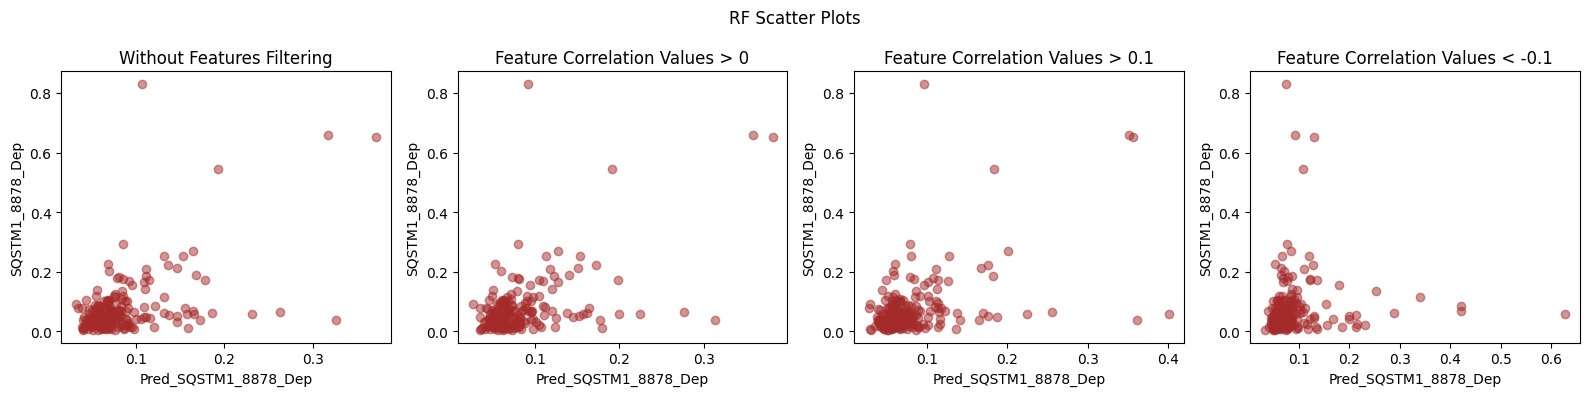

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_paths = [
    '/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/RF_SQSTM1_filtered_arranged_table.csv',
    '/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/RF_SQSTM1_gt_00.csv',
    '/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/RF_SQSTM1_gt_01.csv',
    '/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/RF_SQSTM1_ng_01.csv'
]

dfs = []  # List to store the DataFrames

# Read each CSV file and append to the list
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle('RF Scatter Plots')

# Create scatter plots
titles = ['Without Features Filtering', 'Feature Correlation Values > 0', 'Feature Correlation Values > 0.1',
          'Feature Correlation Values < -0.1']

for i, df in enumerate(dfs):
    ax = axs[i]  # Select the subplot
    ax.scatter(df['Pred_SQSTM1_8878_Dep'], df['SQSTM1_8878_Dep'], c='BROWN', alpha=0.5)
    ax.set_xlabel('Pred_SQSTM1_8878_Dep')
    ax.set_ylabel('SQSTM1_8878_Dep')
    ax.set_title(titles[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plots
plt.show()
